In [14]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 훈련된 모델 로드
model = YOLO('D:\\project\\prjvenv\\runs\\detect\\human_fall_s30\\weights\\best.pt')

# 테스트할 이미지 로드
image = cv2.imread('D:\\human_fall\\train_origin\\N\\00002_H_A_N_C6_I001.jpg')

In [13]:
# cv2로 결과 시각화

result = model(image)
result_img = result[0].plot()

cv2.namedWindow("test", cv2.WINDOW_NORMAL)
cv2.resizeWindow("test", 960, 540) #window 크기 조절

cv2.imshow('test', result_img)
cv2.waitKey()
cv2.destroyAllWindows ()


0: 384x640 2 Non_Falls, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


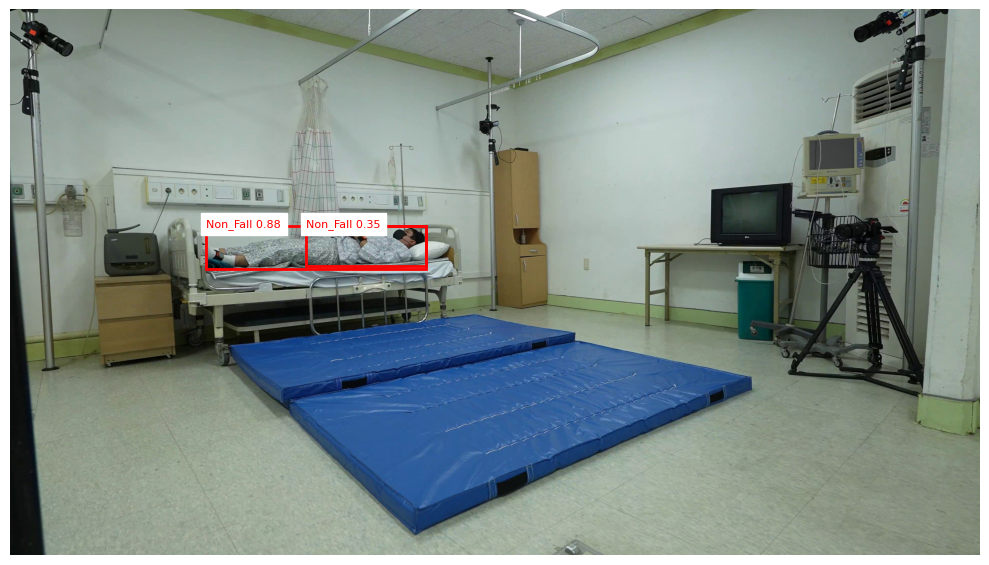

In [15]:
# plt로 결과 시각화

plt_img = cv2.imread('D:\\human_fall\\train_origin\\N\\00002_H_A_N_C6_I001.jpg')
plt_img_rgb = cv2.cvtColor(plt_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))  # 창 크기 설정 (인치 단위)
plt.imshow(plt_img_rgb)

for r in result:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        
        # 바운딩 박스 그리기
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2))
        
        # 클래스 이름과 신뢰도 표시
        cls = int(box.cls)
        conf = float(box.conf)
        class_name = model.names[cls]
        label = f'{class_name} {conf:.2f}'
        plt.text(x1, y1, label, color='red', fontsize=8, backgroundcolor='white')

plt.axis('off')  # 축 제거
plt.tight_layout()  # 레이아웃 조정
plt.show()